In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
# for reading image
import matplotlib.image as img
figure=img.imread(r'C:\Users\........jpg')
print(figure.shape)

(3000, 4000, 3)


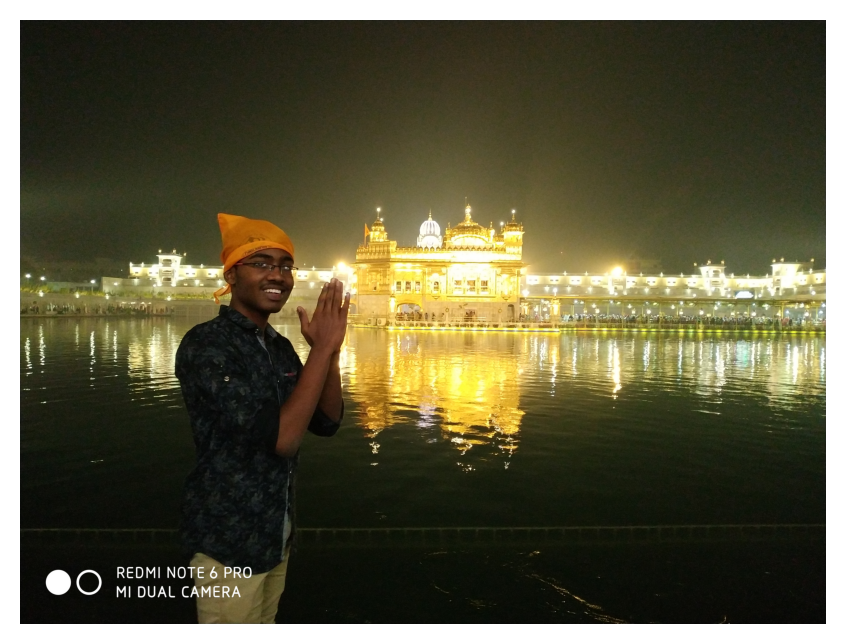

In [29]:
# now to see image
#here dpi value is proportional to value of area
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(figure)
plt.show()

In [30]:
# now storing RGB values of all pixels through lists
# initialized 3 lists
r=[]
g=[]
b=[]
for subbu in figure:
    for first_r,first_g,first_b in subbu:
        r.append(first_r)
        g.append(first_g)
        b.append(first_b)

In [31]:
df=pd.DataFrame({'red':r,'blue':b,'green':g})

In [32]:
df.head()

,red,blue,green
0,10,7,9
1,14,11,13
2,21,19,21
3,13,11,13
4,16,14,16


In [33]:
# to normalize data
from sklearn.preprocessing import Normalizer
cum=Normalizer()
df1=cum.fit_transform(df)
df1=pd.DataFrame(df1,index=df.index,columns=df.columns)

In [34]:
df1.head()

,red,blue,green
0,0.659380,0.461566,0.593442
1,0.635053,0.498970,0.589692
2,0.595640,0.538912,0.595640
3,0.606788,0.513436,0.606788
4,0.601317,0.526152,0.601317


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtitle'

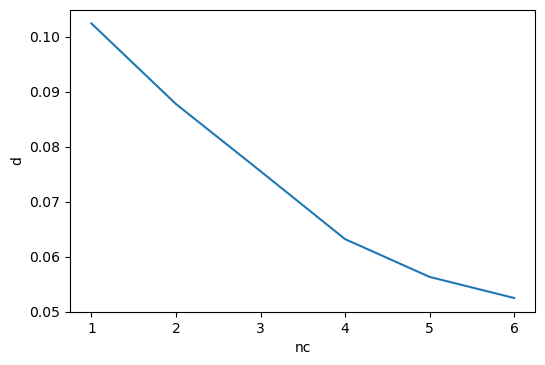

In [35]:
# code for getting elbow plot
from scipy.cluster.vq import kmeans,vq
distortions=[]
# num clusters means numbers represented on x axis give 1 to 6
num_clusters=range(1,7)
# creating list of distortions from kmeans function
for i in num_clusters:
    cluster_centres,distortion=kmeans(df1[['red','green','blue']],i)
    distortions.append(distortion)
# create data frame with cluster_centres,distortions
df3=pd.DataFrame({'nc':num_clusters,'d':distortions})
# now creating lineplot for nc vs d
plt.figure(dpi=100)
sns.lineplot(x='nc',y='d',data=df3)
plt.xticks(num_clusters)
plt.xtitle('num_clusters')
plt.ytitle('distortions')
plt.show()

In [36]:
# kmeans,getting cluster_centres
cluster_centres,distortion=kmeans(df1[['red','green','blue']],5)
print(cluster_centres)

[[0.58491629 0.74363491 0.31054047]
 [0.62243905 0.65777928 0.42130365]
 [0.55068133 0.62208456 0.55083371]
 [0.78689858 0.56989971 0.1956396 ]
 [0.67908362 0.64001496 0.35647044]]


In [41]:
r_st,g_st,b_st=df[['red','green','blue']].std()
# above step make initially extracted data standardized
colors=[]
for cluster_center in cluster_centres:
    scaled_r,scaled_g,scaled_b=cluster_center
    # now convert each standardized value into scaled value
    colors.append((scaled_r*r_st/255,scaled_g*g_st/255,scaled_b*b_st/255))
    

original image is


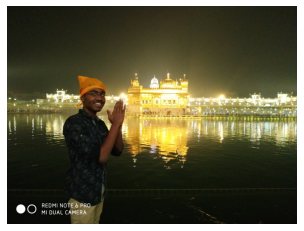

In [42]:
print("original image is")
plt.axis('off')
plt.imshow(figure)
plt.show()

In [43]:
colors

[(0.16146567563445105, 0.1852177353175563, 0.05523621365550731),
 (0.17182380306172007, 0.1638336033601935, 0.07493779670836455),
 (0.15201514162339705, 0.1549430916206253, 0.09797746706382737),
 (0.21722272693820596, 0.1419453706451193, 0.03479865489743764),
 (0.18746049406022094, 0.15940903225594732, 0.06340583337443596)]

final image is...


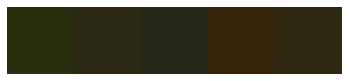

In [44]:
print("final image is...")
plt.axis('off')
plt.imshow([colors])
plt.show()